# Comparing SDO/AIA Response Functions: SSW and SunPy
This notebook runs comparisons between the results of SSW and SunPy in calculating the wavelength and temperature response functions of the AIA instrument on board SDO.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sunpy.instr.aia
%matplotlib inline

 found PyQt4 widgets
 using CLI for selections
 reading chiantirc file
 your version of Python does not support multiprocessing 
 you will not be able to use mspectrum


## Wavelength Response

First, load the SSW results into some convenient data structure.

In [2]:
data = np.loadtxt('../aia_sample_data/aia_wresponse_raw.dat')
channels = [94,131,171,193,211,304,335]
ssw_results = {}
for i in range(len(channels)):
    ssw_results[channels[i]] = {'wavelength':data[:,0],
                                'response':data[:,i+1]}

Run the SunPy calculation.

In [3]:
response = sunpy.instr.aia.Response(path_to_genx_dir='../ssw_aia_response_data/')
response.calculate_wavelength_response()

Plot the results against each other.

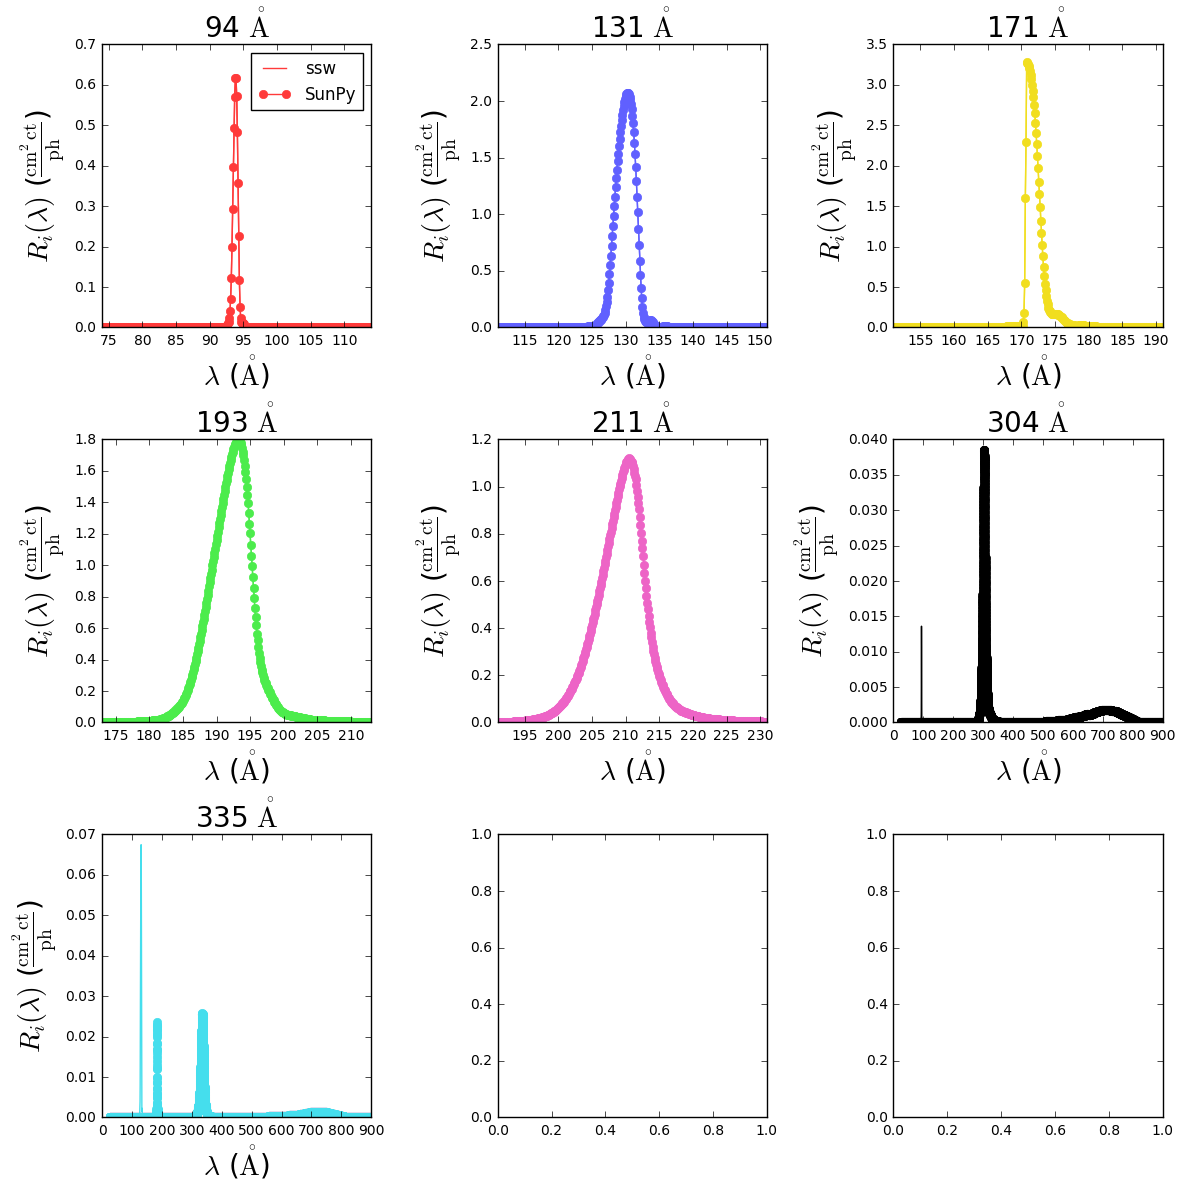

In [15]:
fig,axes = plt.subplots(3,3,figsize=(12,12))
for c,ax in zip(channels,axes.flatten()):
    #ssw
    ax.plot(ssw_results[c]['wavelength'],ssw_results[c]['response'],
           color=response.channel_colors[c],label='ssw')
    #sunpy
    ax.plot(response.wavelength_response[c]['wavelength'],response.wavelength_response[c]['response'],
        color=response.channel_colors[c],marker='.',ms=12,label='SunPy')
    if c!=335 and c!=304:
        ax.set_xlim([c-20,c+20])
    ax.set_title('{} $\mathrm{{\mathring{{A}}}}$'.format(c),fontsize=20)
    ax.set_xlabel(r'$\lambda$ ({0:latex})'.format(response.wavelength_response[c]['wavelength'].unit),fontsize=20)
    ax.set_ylabel(r'$R_i(\lambda)$ ({0:latex})'.format(response.wavelength_response[c]['response'].unit),fontsize=20)
axes[0,0].legend(loc='best')
plt.tight_layout()

## Temperature Response